In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_sku = pd.read_csv('Dillards POS/skuinfo.csv', delimiter='\t', header=None)
df_sku

FileNotFoundError: [Errno 2] No such file or directory: 'Dillards POS/skuinfo.csv'

In [3]:
df_sku = df_sku[0].str.split(',', expand=True)
df_sku

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3,6505,113,000400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,None,None
1,4,8101,002,000400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR,0,None,None
2,5,7307,003,000400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE,0,None,None
3,8,3404,00B,000400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI,0,None,None
4,15,2301,004,000400000015000,126 MDU461,255CAMEL,12,1,0023272,JONES/LA,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564173,9999973,3103,009,000400009973999,702 S3JAYV,STONE,4,1,6813115,POLO JEA,0,None,None
1564174,9999974,9801,726,000400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN,0,None,None
1564175,9999991,2301,004,000400009991999,026 MDU201,618RED ROSE,8,1,0023272,JONES/LA,0,None,None
1564176,9999992,1202,402,000400009992999,14 F52UN1,PALE JADE,L,1,1446212,CABERNET,0,None,None


In [4]:
bad_formatted_rows = df_sku[~df_sku[10].apply(lambda x: str(x).isdigit())]

# Combine column 9 and column 10 separated by a comma and update column 9
bad_formatted_rows[9] = bad_formatted_rows[9] + ',' + bad_formatted_rows[10]

# Delete column 10
bad_formatted_rows.drop(columns=[10], inplace=True)

# Rename the following columns
bad_formatted_rows.columns = list(range(len(bad_formatted_rows.columns)))

# Merge the cleaned rows with the original DataFrame
cleaned_df_sku = pd.concat([df_sku.drop(bad_formatted_rows.index), bad_formatted_rows])

# Reset the index of the merged DataFrame
cleaned_df_sku.reset_index(drop=True, inplace=True)

cleaned_df_sku

<ipython-input-4-10541fe6329f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_formatted_rows[9] = bad_formatted_rows[9] + ',' + bad_formatted_rows[10]
/Users/cathy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3,6505,113,000400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY,0,None,None
1,4,8101,002,000400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR,0,None,None
2,5,7307,003,000400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE,0,None,None
3,8,3404,00B,000400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI,0,None,None
4,15,2301,004,000400000015000,126 MDU461,255CAMEL,12,1,0023272,JONES/LA,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564173,9998016,8305,208,000400008016999,55FF S05900,BLACK,L,1,6213318,"F-50, LL",0,None,NaN
1564174,9999102,5203,002,000400009102999,1 CR-494,BLACK,M,1,0913321,"AHA, INC",0,None,NaN
1564175,9999651,4704,001,000400009651999,20090LBGKB20,FUCHSIA,L,1,7613323,"CWF USA,",0,None,NaN
1564176,9999700,1704,204,000400009700999,40401SNGKB50,BALLET,24,1,7613323,"CWF USA,",0,None,NaN


In [5]:
cleaned_df_sku.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1564178,1564178,1564178,1564178,1564178,1564178,1564178,1564178,1564178,1564178,1564178,20,20
unique,1564178,60,1055,1564178,316782,71574,9829,66,2393,1971,5,3,1
top,2758144,6006,002,000400007847192,N HARDWI,BLACK,L,1,5715232,POLO FAS,0,BROWN SH,0
freq,1,150815,142392,1,541,99813,125605,1533444,147944,130994,1500059,18,20


In [8]:
# Check the number of null values for each column
for i in cleaned_df_sku.columns:
    missing_count = cleaned_df_sku[i].isnull().sum()
    print(f'Missing values in {i}: {missing_count}')

Missing values in 0: 0
Missing values in 1: 0
Missing values in 2: 0
Missing values in 3: 0
Missing values in 4: 0
Missing values in 5: 0
Missing values in 6: 0
Missing values in 7: 0
Missing values in 8: 0
Missing values in 9: 0
Missing values in 10: 0
Missing values in 11: 1564158
Missing values in 12: 1564158


In [15]:
print(cleaned_df_sku.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564178 entries, 0 to 1564177
Data columns (total 13 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1564178 non-null  object
 1   1       1564178 non-null  object
 2   2       1564178 non-null  object
 3   3       1564178 non-null  object
 4   4       1564178 non-null  object
 5   5       1564178 non-null  object
 6   6       1564178 non-null  object
 7   7       1564178 non-null  object
 8   8       1564178 non-null  object
 9   9       1564178 non-null  object
 10  10      1564178 non-null  object
 11  11      20 non-null       object
 12  12      20 non-null       object
dtypes: object(13)
memory usage: 155.1+ MB
None


In [16]:
cleaned_df_sku[0] = pd.to_numeric(cleaned_df_sku[0], errors='coerce')
cleaned_df_sku[1] = pd.to_numeric(cleaned_df_sku[1], errors='coerce')
cleaned_df_sku[2] = pd.to_numeric(cleaned_df_sku[2], errors='coerce')
cleaned_df_sku[3] = pd.to_numeric(cleaned_df_sku[3], errors='coerce')
cleaned_df_sku[7] = pd.to_numeric(cleaned_df_sku[7], errors='coerce')
cleaned_df_sku[8] = pd.to_numeric(cleaned_df_sku[8], errors='coerce')
cleaned_df_sku[10] = pd.to_numeric(cleaned_df_sku[10], errors='coerce')

In [17]:
# Select numeric columns
numeric_columns = cleaned_df_sku.select_dtypes(include=['number'])
print(numeric_columns.describe())

                 0             1             2             3             7   \
count  1.564178e+06  1.564178e+06  1.530202e+06  1.564178e+06  1.564149e+06   
mean   4.997727e+06  5.269137e+03  2.560576e+02  4.000048e+11  1.248841e+00   
std    2.882797e+06  2.178876e+03  2.725098e+02  3.252274e+06  8.900079e+00   
min    3.000000e+00  8.000000e+02  0.000000e+00  4.000000e+11  0.000000e+00   
25%    2.507545e+06  3.701000e+03  6.000000e+00  4.000017e+11  1.000000e+00   
50%    4.992406e+06  5.301000e+03  2.010000e+02  4.000043e+11  1.000000e+00   
75%    7.500381e+06  7.102000e+03  4.110000e+02  4.000079e+11  1.000000e+00   
max    9.999997e+06  9.801000e+03  9.990000e+02  4.000100e+11  9.990000e+02   

                 8             10  
count  1.564158e+06  1.564178e+06  
mean   4.249628e+06  1.848481e+00  
std    3.015305e+06  1.075991e+03  
min    1.000000e+00  0.000000e+00  
25%    1.210256e+06  0.000000e+00  
50%    4.816434e+06  0.000000e+00  
75%    6.613321e+06  0.000000e+00  


In [18]:
correlation_matrix = cleaned_df_sku.corr()
print(correlation_matrix)

          0         1         2         3         7         8         10
0   1.000000  0.000502 -0.005997 -0.006265  0.001641 -0.002837  0.001061
1   0.000502  1.000000  0.113840  0.014654 -0.005743 -0.033439  0.000061
2  -0.005997  0.113840  1.000000  0.003280 -0.009226 -0.092607  0.000451
3  -0.006265  0.014654  0.003280  1.000000 -0.001211 -0.003468  0.000619
7   0.001641 -0.005743 -0.009226 -0.001211  1.000000  0.001466  0.031151
8  -0.002837 -0.033439 -0.092607 -0.003468  0.001466  1.000000 -0.099739
10  0.001061  0.000061  0.000451  0.000619  0.031151 -0.099739  1.000000


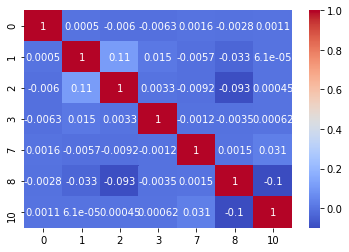

In [19]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()